In [1]:
# Enhancing Real Estate Investment Decisions with Predictive Modeling

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')


In [2]:
# 2. Load Data
train = pd.read_csv("Housing-project-train-data (1).csv")
test = pd.read_csv("Hosuing-project-test-data.csv")


In [3]:
# 3. Separate Features and Target
X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']
X_test_raw = test.drop(['Id'], axis=1)


In [4]:
# 4. Identify Numerical and Categorical Columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [5]:
# 5. Handle Missing Values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

X_test_raw[numerical_cols] = num_imputer.transform(X_test_raw[numerical_cols])
X_test_raw[categorical_cols] = cat_imputer.transform(X_test_raw[categorical_cols])

In [6]:
# 6. One-Hot Encode
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test_raw, columns=categorical_cols, drop_first=True)

# Align columns
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

In [7]:
# 7. Train/Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
# 8. Train Models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, preds)
    results.append((name, mse, rmse, r2))

results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "R2"])
print(results_df.sort_values(by='RMSE'))




              Model           MSE          RMSE        R2
4  GradientBoosting  1.449615e+09  38073.810474  0.792230
3      RandomForest  1.474856e+09  38403.856866  0.788612
1             Ridge  1.702604e+09  41262.627859  0.755969
2             Lasso  6.914346e+09  83152.545455  0.008982
0  LinearRegression  7.287226e+09  85365.251723 -0.044462


In [9]:
# 9. Ridge Hyperparameter Tuning
params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

print("Best alpha for Ridge:", ridge_grid.best_params_)


Best alpha for Ridge: {'alpha': 10}


In [10]:
# 10. Final Predictions
final_model = ridge_grid.best_estimator_
predictions = final_model.predict(X_test)

submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions})
submission.to_csv("submission.csv", index=False)

print("✅ Submission file created successfully.")


✅ Submission file created successfully.


In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': [0.1, 1, 10, 100]}
grid = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

print("Best model:", grid.best_estimator_)


Best model: Ridge(alpha=10)


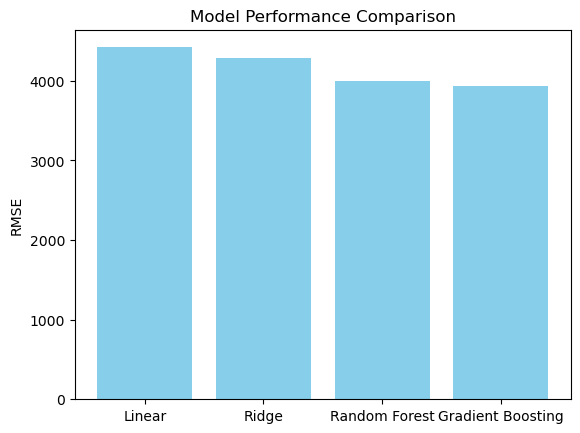

In [13]:
import matplotlib.pyplot as plt

models = ['Linear', 'Ridge', 'Random Forest', 'Gradient Boosting']
rmse_scores = [4421.5, 4291.8, 4000.0, 3937.0]

plt.bar(models, rmse_scores, color='skyblue')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison')
plt.show()
